In [ ]:
!pip install graphviz

# Minimum Spanning Tree (MST)

**NOTA**: Para esta tarea, es posible utilizar las funciones de la tarea anterior para definir y graficar un grafo.

## 0.- Para el ejercicio 1, construye y visualiza el siguiente **grafo G** con el modulo de **graphviz**

<img src="MST.png" width="50%" height="50%">

## 1.- (10pts) Implementar el algoritmo Kruskal. Encuentra y visualiza el MST del grafo G.

In [ ]:
from graphviz import Graph, Digraph
from IPython.display import display
import operator


def plotear_grafica(G, color = {}, size = 7):
  # Función para dibujar un grafo no dirigido
    grafica = Graph(graph_attr = {'size':str(size)})
    for vertice in G:
        if not vertice in color or color[vertice] == 'white':
            grafica.node(vertice)
        else:
            if color[vertice] == 'black':
                grafica.node(vertice, 
                              style = 'filled', 
                              color = color[vertice], 
                              fontcolor = 'white')
            else:
                grafica.node(vertice, 
                              style = 'filled', 
                              color = color[vertice])
    for n1 in G:
        for n2 in G[n1]:
            if n1 < n2:
                grafica.edge(n1, n2, label=str((G[n1])[n2]))
    display(grafica)
    
   
def make_link(G, v1, v2, w):
    # Creando el arbol
    if v1 not in G:
        G[v1] = {}
    (G[v1])[v2] = w
    if v2 not in G:
        G[v2] = {}
    (G[v2])[v1] = w
    return G


def crear_grafo(aristas):
    # Funcion para crear grafos a partir de una lista de aristas
    ret = {}
    for v1, v2, w in aristas:
        make_link(ret, v1, v2, w)
    return ret


def init_alg_kruskal(G):
    # Implementaci\'on del algoritmo de Kruskal
    sets = {}
    for vertice in G:
        if vertice not in sets:
            sets[vertice] = set([vertice])
    return sets

def srch_parent(sets, v):
    while not isinstance( sets[v], set):
        v = sets[v]
    return v
        
def alg_kruskal(G, aristas):
    MST = {}
    sets = init_alg_kruskal(G); aristas.sort(key=operator.itemgetter(2))
    
    for v1, v2, w in aristas:
        v1_p = srch_parent(sets, v1); v2_p = srch_parent(sets, v2)
        
        union = sets[v1_p]|sets[v2_p]
        if (union != sets[v1_p]) and (union != sets[v2_p]):
            sets[v1_p] = union
            sets[v2_p] = v1_p
            make_link(MST, v1, v2, w)
            plotear_grafica(MST, {})
        else:
            print("Ignorado " + v1+'-'+v2)
            
    return MST

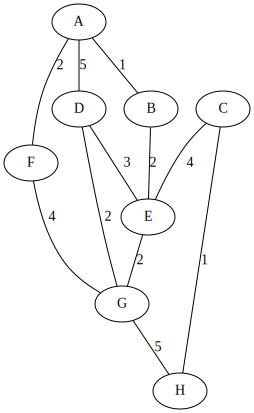

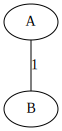

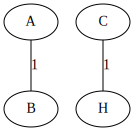

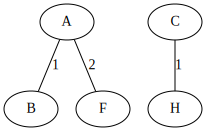

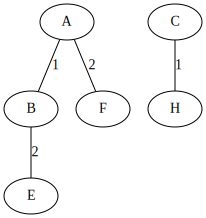

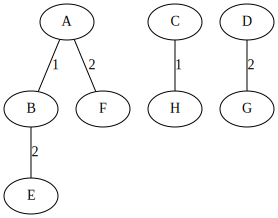

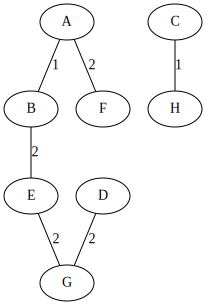

Ignorado D-E


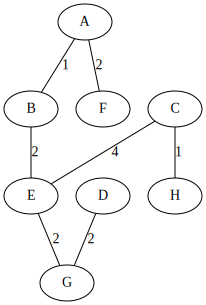

Ignorado F-G
Ignorado A-D
Ignorado G-H


In [ ]:
# Creando grafo para el ejercicio 1
aristas1 = [('A', 'B', 1), 
            ('A', 'D', 5), 
            ('A', 'F', 2), 
            ('B', 'E', 2), 
            ('C', 'E', 4),
            ('C', 'H', 1),
            ('D', 'E', 3),
            ('D', 'G', 2),
            ('E', 'G', 2),
            ('F', 'G', 4),
            ('G', 'H', 5)]
G1 = crear_grafo(aristas1)
plotear_grafica(G1, {})

# Run
__= alg_kruskal(G1, aristas1)

## 2.- (10pts) Agrupamiento con espacio maximo

Dada una coleccion de objetos, el problema de **agrupamiento-k** consiste en dividir dichos objetos en k grupos, tal que, objetos que pertenecen al mismo grupo esten "cercanos", y objetos de diferentes grupos esten "lejanos". Para lograr este agrupamiento, es posible definir una funcion de distancia o similitud entre los objetos, con la idea de que objetos a una distancia grande son objectos poco similares.


Definimos el **espacio** de un agrupamiento-k, como la distancia minimia entre cualquier par de puntos que pertenecen a diferente grupo. Un agrupamiento con espacio maximo consiste en encontrar el agrupamiento-k, tal que el distancia minima entre objetos de diferentes grupos es maxima.

<img src="AEM.png" width="80%" height="80%">

**Pregunta**: Describe como se relaciona el problema de MST y el problema de agrupamiento con espacio maximo?


### Respuesta
De manera directa podemos ver que el _MST_ genera agrupaciones, si tomamos al algoritmo de __kruskal__ como metodo para generar el _MST_ , podemos ver que va formando agrupaciones de los datos que tienen un __menor__ costo comunicarse entre ellos. Siguiendo el mismo pensamiento, los ultimos nodos que se conectan seran aquellos con mayor distancia entre los dem\'as nodos. Por lo que una estrategia para encontrar el __k-agrupamiento__ podr\'ia ser ejecutar el algoritmo de __Kruskal__ hasta que \'unicamente falten $k - 1$ _aristas_ para completar el _MST_ , dichas aristas seran las m\'as pesadas, los bosques que ya esten formados hasta este momento seran los $k$ grupos buscados y las aristas faltantes seran las que unan a los grupos.

**Implementacion**: Dado el conjuto de puntos del archivo X.txt, utiliza una de tus implementaciones para MST y resuelve le problema de **agrupamiento con espacio maximo**, con $k=2$

**Como funcion de distancia utiliza la distancia euclidiana.**

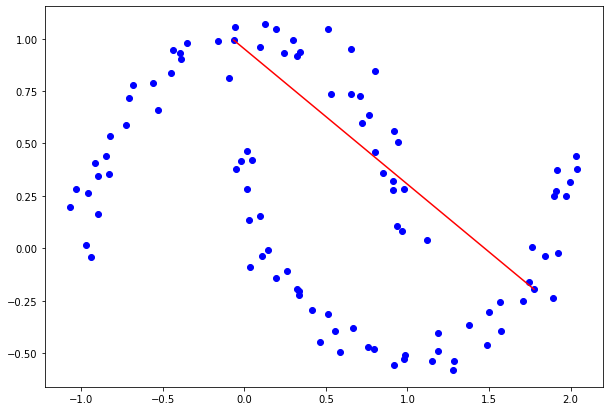

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# importar informacion
X = np.loadtxt('X.txt')

# graficar todos los puntos
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], color='b')

# conexion entre dos nodos
plt.plot([X[0,0], X[1,0]], [X[0,1],X[1,1]], c='red')

plt.show()

Finalmente, visualiza el conjunto de puntos, dando un color diferente a cada grupo

In [ ]:
# Funciones
#######################

# imports
from math import sqrt, factorial

# Getters
def getX(n):
    return X[int(n),0]
def getY(n):
    return X[int(n),1]

# Funcion para ploter linea entre puntos
def l_puntos(x, y, color='red'):
    plt.plot([getX(x), getX(y)], [getY(x),getY(y)], c=color)
    
# Funcion para ploter punto
def p_punto(x, color='blue'):
    plt.plot([getX(x)],[getY(x)], 'o', color=color)
    
# Funcion para medir la distancia euclidiana
def d_puntos(x, y):
    return ( (getX(x)-getX(y))**2 + (getY(x)-getY(y))**2 )**(1/2)

# Funcion choos k on 2
def comb(k):
    return factorial(k)/(factorial(2)*factorial(k-2))


# Recorrido de nodos al estilo DFS
def DFS(G, nodo, colores, omitir, color):
    colores[nodo] = 'grey'
    p_punto(nodo, color=color)
    for vecino in G[nodo]:
        if (colores[vecino] == 'white') and (vecino not in omitir):
            colores[vecino] = 'grey'
            DFS(G, vecino, colores, omitir, color)

def alg_kruskal_2(G, aristas):
    MST = {}
    sets = init_alg_kruskal(G); aristas.sort(key=operator.itemgetter(2))
    
    for v1, v2, w in aristas:
        v1_p = srch_parent(sets, v1); v2_p = srch_parent(sets, v2)
        
        union = sets[v1_p]|sets[v2_p]
        if (union != sets[v1_p]) and (union != sets[v2_p]):
            sets[v1_p] = union
            sets[v2_p] = v1_p
            make_link(MST, v1, v2, w)
            l_puntos(int(v1),int(v2))
        else:
            #print("Ignorado " + v1+'-'+v2)
            pass
            
    return MST

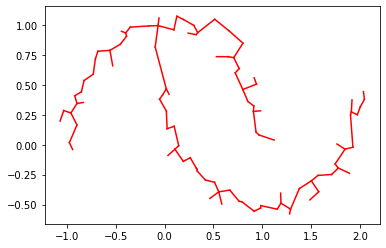

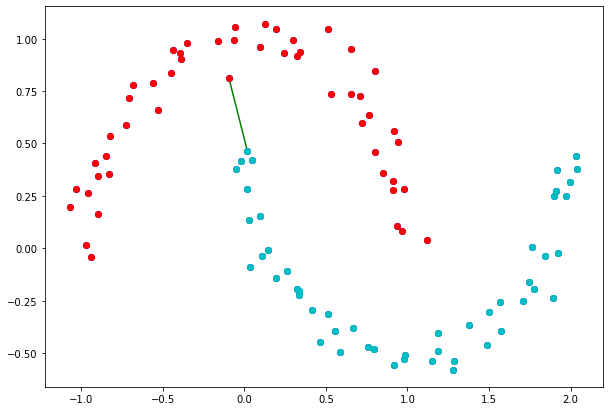

In [ ]:
# Creacion aristas
aristas2 = []

n_datos = len(X[:,0])
for i in range(n_datos):
    for j in range(i+1, n_datos):
        aristas2.append( (str(i), str(j), d_puntos(i,j)) )
        
# Creando grafo
G2 = crear_grafo(aristas2)

MST2 = alg_kruskal_2(G2, aristas2)

# Colores para grupos
color = ['c','r','y','b','m','g']

# Listas para trabajar
colores = {}    #dictenter
omitir = []     #list

for nodo in MST2:
    colores[nodo] = 'white'

# Encontrar vertice maximo
# en este caso como solo se busca uno se implementa asi

a_max = ('Err', 'Err', -np.Inf)      #Valor que sabemos no aparece en las longitudes
for vertex in MST2:
    for vecino in MST2[vertex]:
        temp = (MST2[vertex])[vecino]
        a_max = (vertex, vecino, temp) if temp > a_max[2] else a_max
omitir.append(a_max[0])
omitir.append(a_max[1])

# visualizacion de los puntos
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], color='b')

# Visualizar aristas de union de grupos
l_puntos(int(a_max[0]), int(a_max[1]), color='g')

# Coloraci\'on de grupos
##### 
for i in range(len(omitir)):
    DFS(MST2, omitir[i], colores, omitir, color[i])